In [3]:
import gensim
import pandas as pd
from config import *
from tools import *
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec
import matplotlib.pyplot as plt
from IPython.display import clear_output

2020-06-05 08:04:29,694 : INFO : 'pattern' package not found; tag filters are not available for English


In [4]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [5]:
tr_clk_list_df = pd.read_pickle(TRAIN_DIR+CLK_PATH_DICT['ad_id'])
ts_clk_list_df = pd.read_pickle(TEST_DIR+CLK_PATH_DICT['ad_id'])

In [6]:
grid_df = pd.concat([tr_clk_list_df, ts_clk_list_df], axis=0)
del tr_clk_list_df, ts_clk_list_df

In [7]:
grid_df['ad_id'] = grid_df['ad_id'].map(lambda x: list(map(str, x)))

In [8]:
sentences = grid_df['ad_id'].values.tolist()

In [9]:
class loss(object):
    def __init__(self):
        self.loss_list = []

In [15]:
### Gensim callback
#####################################
class callback(CallbackAny2Vec):
    '''Callback to print loss after each epoch.'''

    def __init__(self):
        self.epoch = 0
        self.loss = loss()

    def on_epoch_end(self, model):
        clear_output(wait=True)
        loss = model.get_latest_training_loss()
        
        self.loss.loss_list.append(loss)
        ### show loss
        if len(self.loss.loss_list) > 1:
            tmp = np.array(self.loss.loss_list)
            plt.plot(tmp[1:]-tmp[:-1])
            plt.show()
            
        print('loss list: ', self.loss.loss_list)
        print('Loss after epoch {}: {}'.format(self.epoch, loss))
        model.save('/home/huangzc/competition/tencent/model_ckpt/gensim/model.txt')
        self.epoch += 1

In [99]:
### Gensim Parameter
######################################
params = {'sentences': sentences,
          'size': 50,
          'window': 20,
          'min_count': 2,
          'compute_loss': True,
          'sample': 0.0001,
          'iter': 200,
          'workers': 25,
          'callbacks': [callback()]}

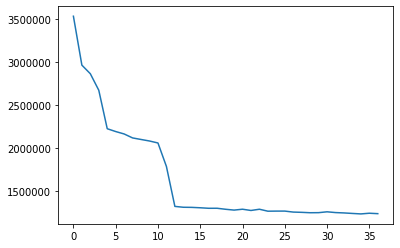

2020-06-06 11:12:13,730 : INFO : saving Word2Vec object under /home/huangzc/competition/tencent/model_ckpt/gensim/model.txt, separately None
2020-06-06 11:12:13,731 : INFO : storing np array 'vectors' to /home/huangzc/competition/tencent/model_ckpt/gensim/model.txt.wv.vectors.npy


loss list:  [5286048.0, 8817733.0, 11781148.0, 14644372.0, 17315822.0, 19540010.0, 21731380.0, 23894604.0, 26011754.0, 28110924.0, 30192388.0, 32250834.0, 34036380.0, 35357652.0, 36668920.0, 37978884.0, 39284192.0, 40583504.0, 41883056.0, 43170856.0, 44449212.0, 45737648.0, 47011572.0, 48299800.0, 49565276.0, 50831808.0, 52098488.0, 53353744.0, 54605944.0, 55853600.0, 57102052.0, 58360428.0, 59609904.0, 60855220.0, 62094596.0, 63328464.0, 64570272.0, 65807128.0]
Loss after epoch 37: 65807128.0


2020-06-06 11:12:14,225 : INFO : not storing attribute vectors_norm
2020-06-06 11:12:14,226 : INFO : storing np array 'syn1neg' to /home/huangzc/competition/tencent/model_ckpt/gensim/model.txt.trainables.syn1neg.npy
2020-06-06 11:12:14,827 : INFO : not storing attribute cum_table
2020-06-06 11:12:26,279 : INFO : saved /home/huangzc/competition/tencent/model_ckpt/gensim/model.txt
2020-06-06 11:12:27,343 : INFO : EPOCH 39 - PROGRESS: at 0.53% examples, 297333 words/s, in_qsize 36, out_qsize 13
2020-06-06 11:12:28,600 : INFO : EPOCH 39 - PROGRESS: at 1.55% examples, 399358 words/s, in_qsize 47, out_qsize 2
2020-06-06 11:12:29,702 : INFO : EPOCH 39 - PROGRESS: at 2.49% examples, 432709 words/s, in_qsize 41, out_qsize 8
2020-06-06 11:12:30,705 : INFO : EPOCH 39 - PROGRESS: at 3.10% examples, 415968 words/s, in_qsize 48, out_qsize 1
2020-06-06 11:12:32,120 : INFO : EPOCH 39 - PROGRESS: at 4.05% examples, 411681 words/s, in_qsize 46, out_qsize 3
2020-06-06 11:12:33,129 : INFO : EPOCH 39 - PRO

2020-06-06 11:13:44,398 : INFO : EPOCH 39 - PROGRESS: at 51.96% examples, 391030 words/s, in_qsize 49, out_qsize 0
2020-06-06 11:13:45,475 : INFO : EPOCH 39 - PROGRESS: at 52.71% examples, 391436 words/s, in_qsize 49, out_qsize 0
2020-06-06 11:13:46,520 : INFO : EPOCH 39 - PROGRESS: at 53.34% examples, 390934 words/s, in_qsize 45, out_qsize 4
2020-06-06 11:13:48,113 : INFO : EPOCH 39 - PROGRESS: at 54.28% examples, 390093 words/s, in_qsize 46, out_qsize 3
2020-06-06 11:13:49,119 : INFO : EPOCH 39 - PROGRESS: at 55.28% examples, 392485 words/s, in_qsize 41, out_qsize 8
2020-06-06 11:13:50,166 : INFO : EPOCH 39 - PROGRESS: at 55.84% examples, 391546 words/s, in_qsize 48, out_qsize 1
2020-06-06 11:13:51,231 : INFO : EPOCH 39 - PROGRESS: at 56.83% examples, 393469 words/s, in_qsize 49, out_qsize 0
2020-06-06 11:13:52,243 : INFO : EPOCH 39 - PROGRESS: at 57.81% examples, 395493 words/s, in_qsize 42, out_qsize 7
2020-06-06 11:13:53,591 : INFO : EPOCH 39 - PROGRESS: at 58.97% examples, 397313

KeyboardInterrupt: 

In [100]:
model = Word2Vec(**params)

In [101]:
# ### Restore Model
# # #####################################
save_path = '/home/huangzc/competition/tencent/model_ckpt/gensim/model.txt'
model = Word2Vec.load(save_path)

2020-06-06 11:14:39,507 : INFO : loading Word2Vec object from /home/huangzc/competition/tencent/model_ckpt/gensim/model.txt
2020-06-06 11:14:46,936 : INFO : loading wv recursively from /home/huangzc/competition/tencent/model_ckpt/gensim/model.txt.wv.* with mmap=None
2020-06-06 11:14:46,937 : INFO : loading vectors from /home/huangzc/competition/tencent/model_ckpt/gensim/model.txt.wv.vectors.npy with mmap=None
2020-06-06 11:14:47,266 : INFO : setting ignored attribute vectors_norm to None
2020-06-06 11:14:47,268 : INFO : loading vocabulary recursively from /home/huangzc/competition/tencent/model_ckpt/gensim/model.txt.vocabulary.* with mmap=None
2020-06-06 11:14:47,268 : INFO : loading trainables recursively from /home/huangzc/competition/tencent/model_ckpt/gensim/model.txt.trainables.* with mmap=None
2020-06-06 11:14:47,269 : INFO : loading syn1neg from /home/huangzc/competition/tencent/model_ckpt/gensim/model.txt.trainables.syn1neg.npy with mmap=None
2020-06-06 11:14:47,911 : INFO : se

### 新方法

In [102]:
vocab = model.wv.index2word

In [103]:
vocab_dict = dict(zip(vocab, list(range(len(vocab)))))

In [104]:
f = open(TRAIN_DIR+'gensim_ad_id_dict.js','w')
f.write(str(vocab_dict))
f.close()

In [105]:
wv_matrix = model.wv.vectors

In [106]:
np.save(TRAIN_DIR+'gensim_ad_id.npy', wv_matrix)